In [42]:
from omniglot import OmniglotDataset, OmniglotSampler, get_omniglot_dataloader

In [43]:
# num_support : support example for each class
# num_query : num of query examples for each class

## Dataset is designed to provide One Instance of Training Set
omniglot_dataset = OmniglotDataset(num_support=3,num_query=2)

# num_way -> total num of Classes,  num_tasks_per_epoch = can be sampled 10 times
sampler = OmniglotSampler( [1,2,3,4,5,6,7], 5, 10)

In [47]:
# That input list is given by sampler 
one_instance = omniglot_dataset.__getitem__( [4, 1, 6, 2, 5])

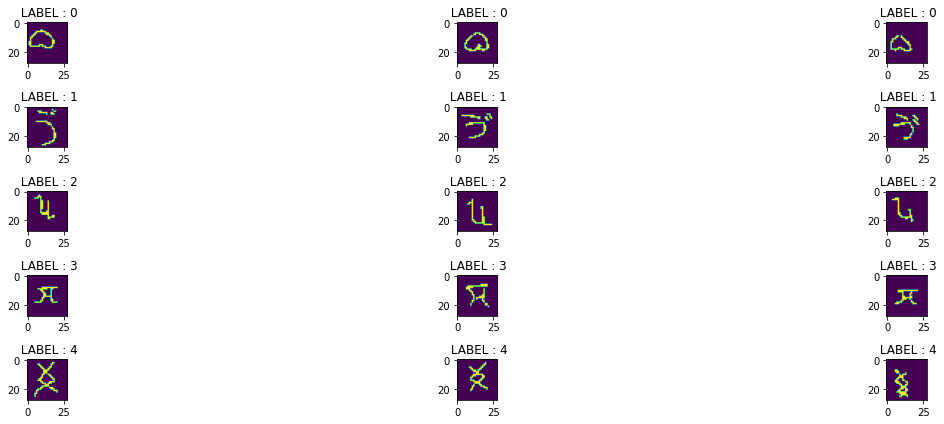

In [48]:
## plot support set of this instance
plot_examples( one_instance[0], one_instance[1], 5,3 )

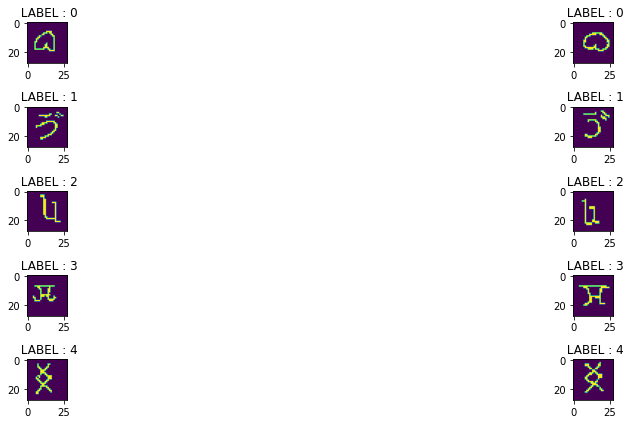

In [49]:
plot_examples( one_instance[2], one_instance[3], 5, 2 )

In [50]:
# split (str): one of 'train', 'val', 'test'
#         batch_size (int): number of tasks per batch
#         num_way (int): number of classes per task
#         num_support (int): number of support examples per class
#         num_query (int): number of query examples per class
#         num_tasks_per_epoch (int): number of tasks before DataLoader is
#             exhausted

batch_size = 3
num_way = 5
num_support = 3
num_query = 2
num_tasks_per_epoch=20

dataloader_train = get_omniglot_dataloader(
            'train',
            batch_size = batch_size,
            num_way = num_way,
            num_support = num_support,
            num_query = num_query,
            num_tasks_per_epoch= num_tasks_per_epoch,
        )

In [51]:
for i in enumerate(dataloader_train):
    print(i)
    break

(0, [(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  .

In [52]:
## nth batch index 
i[0]
## batch size
len(i[1])

3

In [53]:
len(i[1][0])

4

In [54]:
## Inside first training example of the batch : i[1][0]
print( "Support Set : for 5 sampled classes, with 3 images each : "  , i[1][0][0].shape)
print( "Support Labels : ", i[1][0][1])


print( "Query Set : for 5 sampled classes, with 3 images each : " , i[1][0][2].shape)
print( "Query Labels : " , i[1][0][3])

Support Set : for 5 sampled classes, with 3 images each :  torch.Size([15, 1, 28, 28])
Support Labels :  tensor([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])
Query Set : for 5 sampled classes, with 3 images each :  torch.Size([10, 1, 28, 28])
Query Labels :  tensor([0, 0, 1, 1, 2, 2, 3, 3, 4, 4])


In [55]:
## Inside Second training example of the batch : i[1][1]
print( "Support Set : for 5 sampled classes, with 3 images each : "  , i[1][1][0].shape)
print( "Support Labels : ", i[1][1][1])


print( "Query Set : for 5 sampled classes, with 3 images each : " , i[1][1][2].shape)
print( "Query Labels : " , i[1][1][3])

Support Set : for 5 sampled classes, with 3 images each :  torch.Size([15, 1, 28, 28])
Support Labels :  tensor([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])
Query Set : for 5 sampled classes, with 3 images each :  torch.Size([10, 1, 28, 28])
Query Labels :  tensor([0, 0, 1, 1, 2, 2, 3, 3, 4, 4])


In [56]:
import matplotlib.pyplot as plt
import torch

In [57]:
def plot_examples( images, labels, rows=num_way, cols=num_support ):
    fig, ax = plt.subplots(nrows=rows, ncols=cols,figsize=(22,6))

    for row_ind in range(rows):
        for col_ind in range(cols):        
            ax[row_ind,col_ind].imshow(
                torch.squeeze( images, dim=1 
                             ).reshape(rows, cols ,28,28)[row_ind][col_ind].numpy())

            # lavel
            label = labels.reshape(rows, cols)[row_ind][col_ind]
            ax[row_ind, col_ind].title.set_text(f' LABEL : {label}' )

    fig.tight_layout()
    plt.show()

In [58]:
nth_set = 2

### PLOT THE SUPPORT SET FOR FIRST EXAMPLE OF THE BATCH

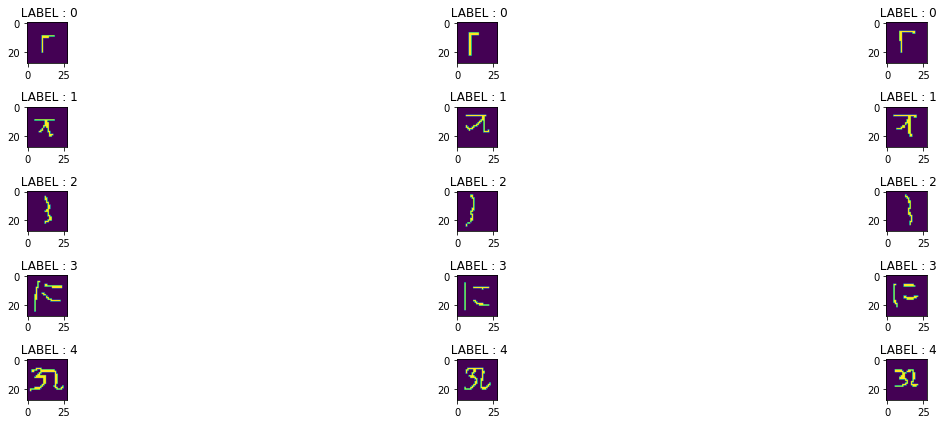

In [59]:
plot_examples( images = i[1][nth_set][0], 
               labels = i[1][nth_set][1], 
               rows=num_way, cols=num_support)

### PLOT THE QUERY SET FOR FIRST EXAMPLE OF THE BATCH

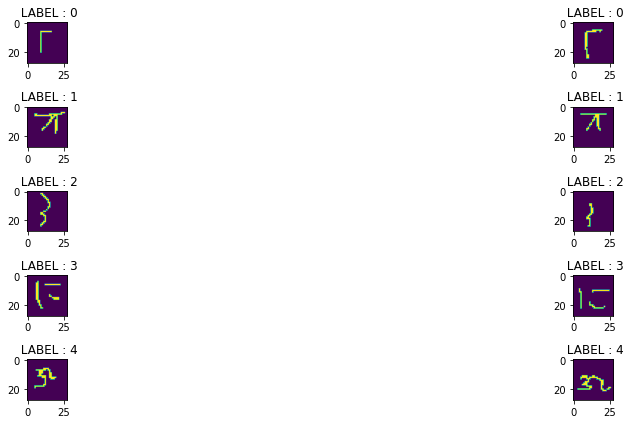

In [60]:
plot_examples( images = i[1][nth_set][2], 
               labels = i[1][nth_set][3],  
               rows=num_way, cols=num_query)

In [69]:
a = 5

In [66]:
def change():
    a = 6

In [70]:
## euclidian distance

In [79]:
x = torch.Tensor(
            [[1,1,1,1],
             [2,2,2,2],
             [5,5,5,5]]
    )

y = torch.Tensor(
            [[1,1,1,1],
             [2,2,2,2],]
    )

In [87]:
torch.mean(x,dim=0)

tensor([2.6667, 2.6667, 2.6667, 2.6667])

In [80]:
torch.cdist(x,y,p=2)

tensor([[0., 2.],
        [2., 0.],
        [8., 6.]])

In [82]:
import numpy as np
array = np.array([-0.0845, -0.0950, -0.0941, -0.0606, -0.0604])

In [84]:
np.exp(array) / ( np.sum(np.exp(array)) )

array([0.19886324, 0.1967861 , 0.19696328, 0.20367332, 0.20371406])

In [ ]:
(np)